# Customer Churn Analysis

Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Target Variable

Churn 

# Importing libraries

In [604]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statistics
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [605]:
tcc=pd.read_csv("Telecom_customer_churn.csv")

In [606]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Looking at the dataset it seems to be a classification dataset

In [607]:
tcc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Initially there are only 3 numerical columns present in this dataset and rest other are categorical

In [608]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values present herem in dataset

In [609]:
tcc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Counting category wise values in churn column

In [610]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Re-confirming numll calues in dataset, as per the observation there are no null values present

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

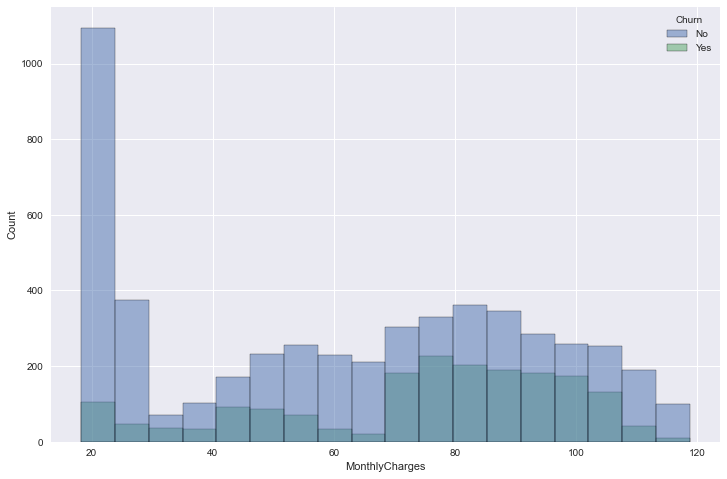

In [611]:
plt.figure(figsize=(12,8))
sns.histplot(x='MonthlyCharges',data=tcc,hue='Churn')

Checking the relation between churn  and monthly charges the  number of 'Yes' is less than the number of 'No'

<AxesSubplot:xlabel='Churn', ylabel='count'>

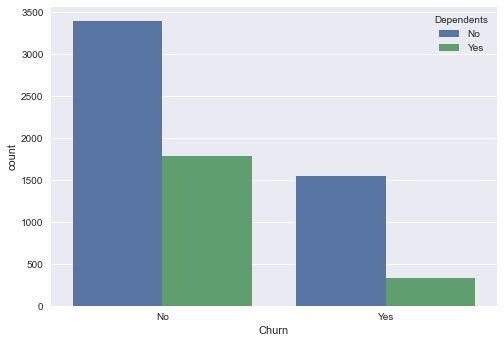

In [612]:
sns.countplot(data=tcc,x='Churn',hue='Dependents')

The above observation shows the relation 'Churn' and 'Dependents' Columns the databseems to be imbalanced

<AxesSubplot:xlabel='tenure', ylabel='Count'>

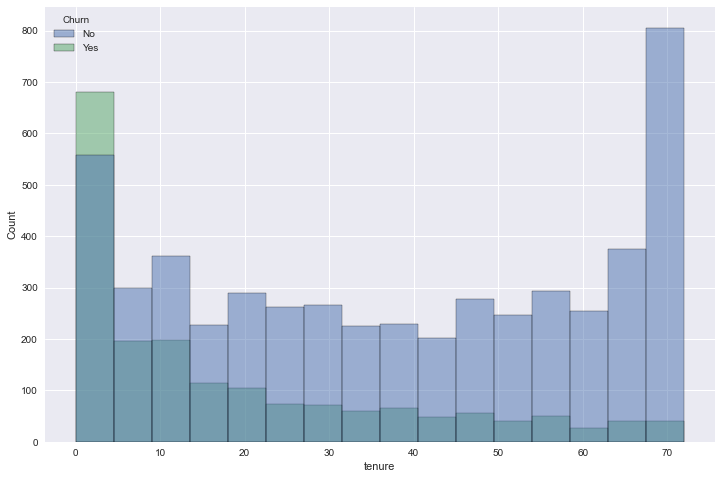

In [613]:
plt.figure(figsize=(12,8))
sns.histplot(x='tenure',data=tcc,hue='Churn')

The above observation shows that more tenure customers are less likely to get Yes in churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

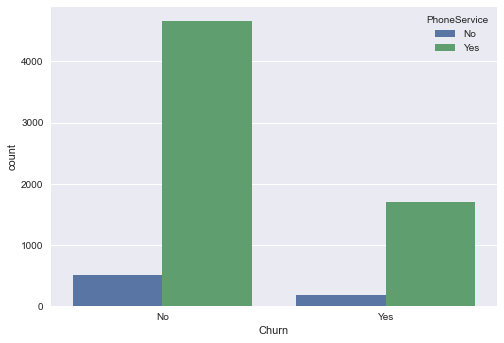

In [614]:
sns.countplot(data=tcc,x='Churn',hue='PhoneService')

The above observation shows a relation  between Phone service and Churn Customers

<AxesSubplot:xlabel='InternetService', ylabel='count'>

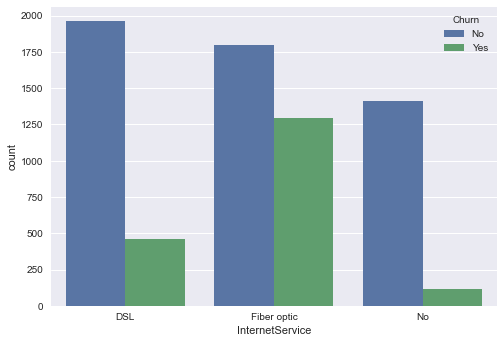

In [615]:
sns.countplot(x='InternetService',data=tcc,hue='Churn')

The above observation shows a relation between Internet service and Churn Customers

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

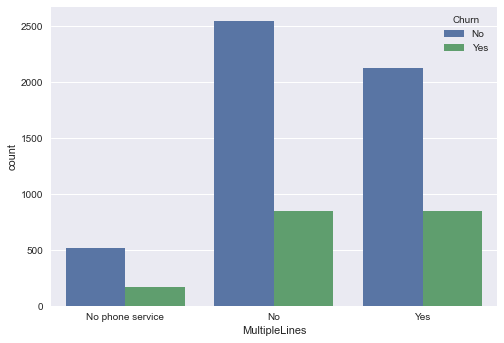

In [616]:
sns.countplot(x='MultipleLines',data=tcc,hue='Churn')

The above visualization shows relation between Churn column and MultipleLines column

<AxesSubplot:xlabel='Contract', ylabel='count'>

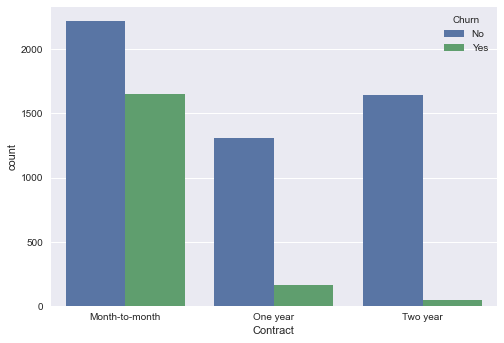

In [617]:
sns.countplot(x='Contract',data=tcc,hue='Churn')

The above visualization shows relation between Churn column and Contract column

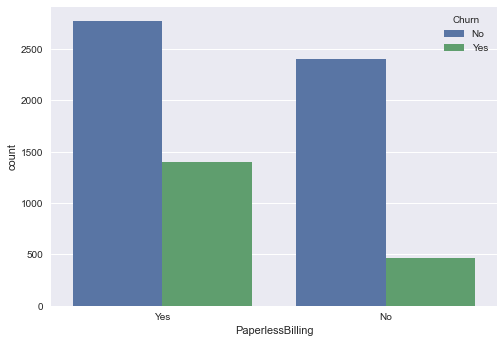

In [618]:
sns.countplot(x=tcc['PaperlessBilling'],hue=tcc['Churn'])
plt.show()

The above visualization shows relation between PaperlessBilling column and Contract column

# Checking For Outliers

<AxesSubplot:>

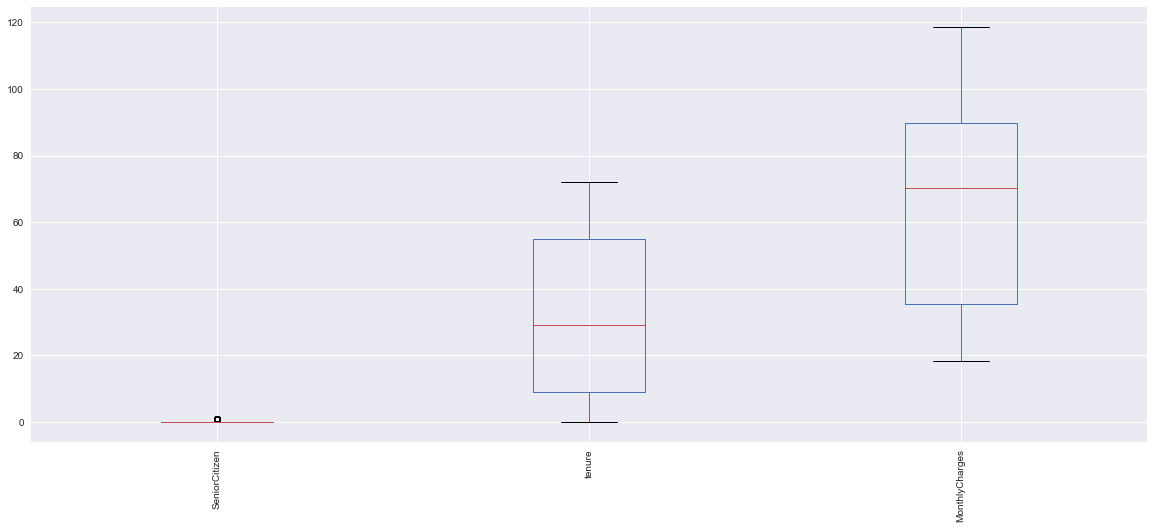

In [619]:
tcc.boxplot( rot = 90, figsize=(20,8))

In [620]:
ss=['SeniorCitizen']

In [621]:
from scipy.stats import zscore
z=np.abs(zscore(tcc[ss]))
tcc_new=tcc[(z<3).all(axis=1)]
print('\nshape before removing outliers',tcc.shape)
print('\nshape after removing outliers',tcc_new.shape)
tcc=tcc_new


shape before removing outliers (7043, 21)

shape after removing outliers (7043, 21)


there is no difference after removing outliers

In [622]:
tcc.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

SeniorCitizen has the skewness above threshold +-0.5 we can try removing skewness

<AxesSubplot:ylabel='Frequency'>

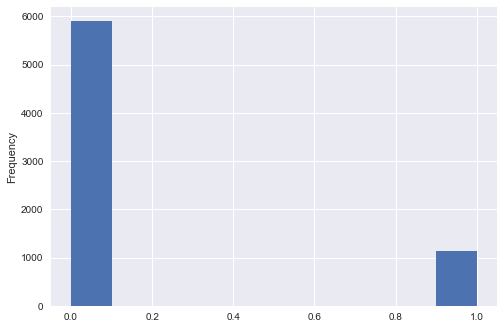

In [623]:
tcc['SeniorCitizen'].plot.hist()

1.8332421986079814


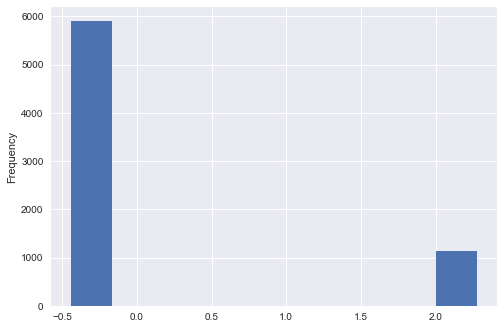

In [624]:
tcc['SeniorCitizen']=power_transform(tcc[['SeniorCitizen']], method='yeo-johnson')
tcc['SeniorCitizen'].plot.hist()
print(skew(tcc['SeniorCitizen']))

There is not much difference in skewnes

In [625]:
tcc[tcc['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,-0.439916,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,-0.439916,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,-0.439916,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,-0.439916,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,-0.439916,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,-0.439916,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,-0.439916,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,-0.439916,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,-0.439916,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,-0.439916,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Checking for blank spaces in total charges column

In [626]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

  


tcc['gender']= label_encoder.fit_transform(tcc['gender'])
tcc['Partner']= label_encoder.fit_transform(tcc['Partner'])
tcc['Dependents']= label_encoder.fit_transform(tcc['Dependents'])
tcc['PhoneService']= label_encoder.fit_transform(tcc['PhoneService'])
tcc['OnlineSecurity']= label_encoder.fit_transform(tcc['OnlineSecurity'])
tcc['OnlineBackup']= label_encoder.fit_transform(tcc['OnlineBackup'])
tcc['DeviceProtection']= label_encoder.fit_transform(tcc['DeviceProtection'])
tcc['TechSupport']= label_encoder.fit_transform(tcc['TechSupport'])
tcc['StreamingTV']= label_encoder.fit_transform(tcc['StreamingTV'])
tcc['StreamingMovies']= label_encoder.fit_transform(tcc['StreamingMovies'])
tcc['PaperlessBilling']= label_encoder.fit_transform(tcc['PaperlessBilling'])
tcc['Churn']= label_encoder.fit_transform(tcc['Churn'])
tcc['Contract']= label_encoder.fit_transform(tcc['Contract'])
tcc['MultipleLines']= label_encoder.fit_transform(tcc['MultipleLines'])
tcc['InternetService']= label_encoder.fit_transform(tcc['InternetService'])
tcc['PaymentMethod']= label_encoder.fit_transform(tcc['PaymentMethod'])





Converting categorical values into numerical values using label encoderm

In [627]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,-0.439916,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,-0.439916,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,-0.439916,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,-0.439916,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,-0.439916,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [628]:
tcc['TotalCharges']=pd.to_numeric(tcc['TotalCharges'], errors='coerce')

Removing bad spaces from Totalcharges column

In [629]:
tcc['TotalCharges'].isnull().sum()

11

In [630]:
tcc['TotalCharges']= tcc['TotalCharges'].fillna(tcc['TotalCharges'].mean())

Filling null values from Total Charges column with mean 

In [631]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value in dataset

<AxesSubplot:xlabel='tenure', ylabel='Count'>

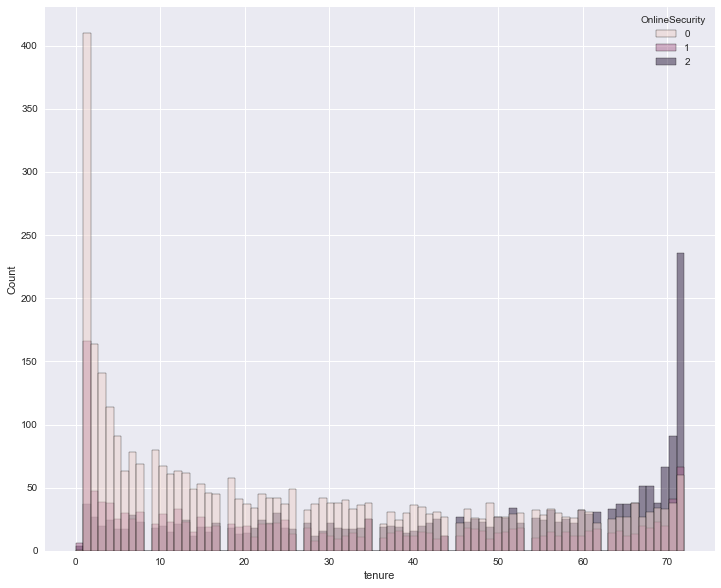

In [632]:
plt.figure(figsize=(12,10))
sns.histplot(x='tenure',data=tcc,hue='OnlineSecurity',bins=80)

The above visualization shows the relation between tenure and OnlineSecurity

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

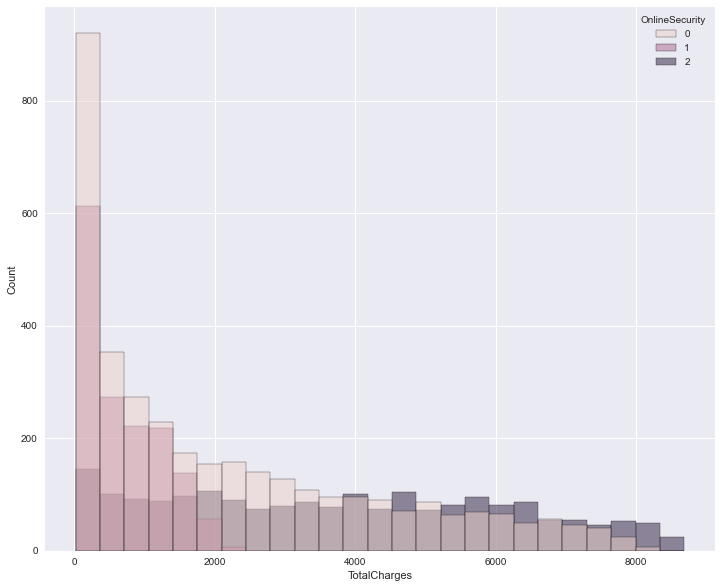

In [633]:
plt.figure(figsize=(12,10))
sns.histplot(x='TotalCharges',data=tcc,hue='OnlineSecurity')

The above visualization shows the relation between TotalCharges and OnlineSecurity

In [634]:
tcc[(tcc['tenure']<20)&(tcc['TotalCharges']<4000)]['OnlineSecurity'].value_counts()

0    1756
1     657
2     394
Name: OnlineSecurity, dtype: int64

In [635]:
tcc['OnlineSecurity']= tcc[(tcc['tenure']<20)&(tcc['TotalCharges']<4000)]['OnlineSecurity'].fillna(0)

In [636]:
tcc.drop(['OnlineSecurity'],axis=1,inplace=True)

Removing 'OnlineSequrity' column because it has more null values

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

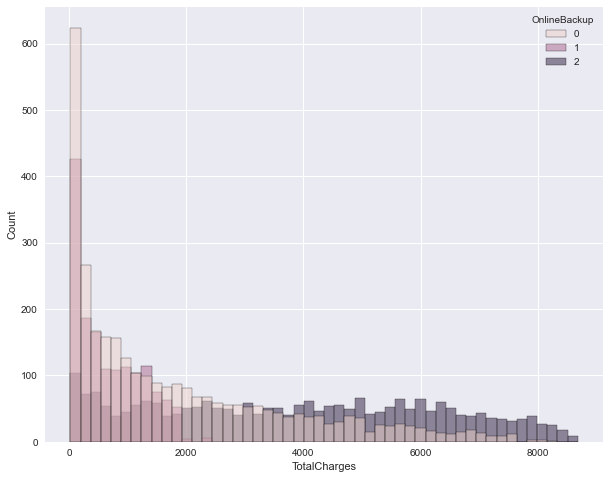

In [637]:
plt.figure(figsize=(10,8))
sns.histplot(x='TotalCharges',data=tcc, hue = 'OnlineBackup',bins=50)

The above Visualization shows relation between TotalCharges and OnlineBackup

In [638]:
tcc[tcc['TotalCharges']<4000]['OnlineBackup'].value_counts()

0    2623
1    1526
2    1246
Name: OnlineBackup, dtype: int64

In [639]:
tcc['OnlineBackup']= tcc['OnlineBackup'].fillna(0)

Filling null values in OnlineBackup with 0

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

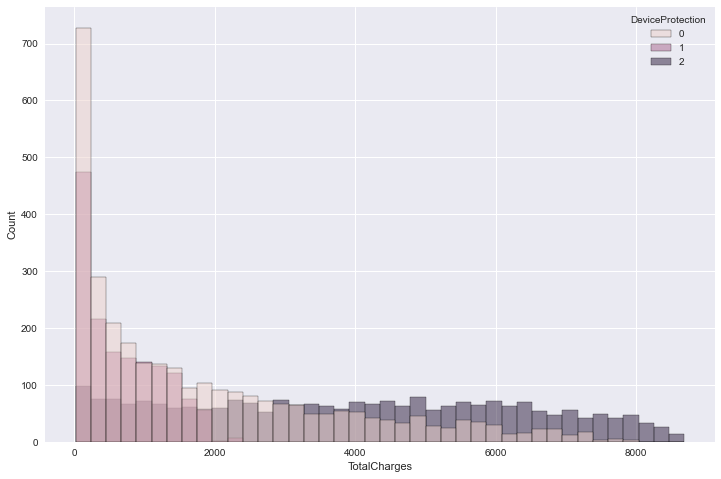

In [640]:
plt.figure(figsize=(12,8))
sns.histplot(x='TotalCharges',hue='DeviceProtection',data=tcc,bins=40)

The above Visualization shows relation between TotalCharges and DeviceProtection

In [641]:
tcc[tcc['TotalCharges']<4000]['DeviceProtection'].value_counts()

0    2634
1    1526
2    1235
Name: DeviceProtection, dtype: int64

In [642]:
tcc['DeviceProtection']= tcc['DeviceProtection'].fillna(0)

Filling null values in DeviceProtection with 0

<AxesSubplot:xlabel='tenure', ylabel='Count'>

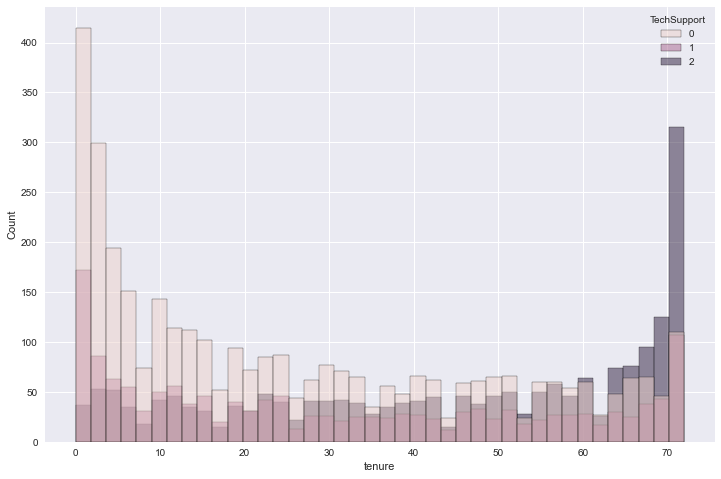

In [643]:
plt.figure(figsize=(12,8))
sns.histplot(x='tenure',data=tcc,hue='TechSupport',bins=40)


The above Visualization shows relation between tenure and TechSupport

In [644]:
tcc[tcc['tenure']>60]['TechSupport'].value_counts()

2    747
0    384
1    276
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

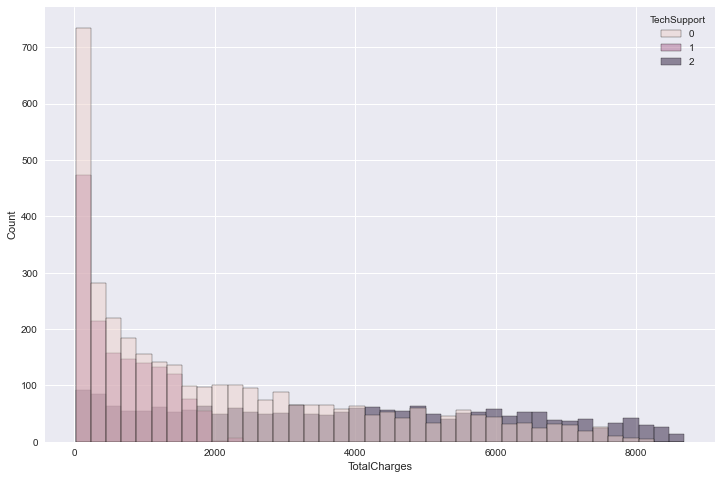

In [645]:
plt.figure(figsize=(12,8))
sns.histplot(x='TotalCharges',data=tcc,hue='TechSupport',bins=40)

The above Visualization shows relation between TotalCharges and TechSupport

In [646]:
tcc[tcc['TotalCharges']<4000]['TechSupport'].isnull().sum()

0

In [647]:
tcc[tcc['TotalCharges']<4000]['TechSupport'].value_counts()

0    2790
1    1526
2    1079
Name: TechSupport, dtype: int64

In [648]:
tcc['TechSupport']=tcc['TechSupport'].fillna(0)

Filling null values in TechSupport with 0

In [649]:
tcc=tcc.drop(['StreamingMovies'],axis=1)

Dropping StreamingMovies column as is not much important

In [650]:
tcc.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,-0.439916,-0.439916,-0.439916,-0.439916,-0.439916
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineBackup,2,0,2,0,0


In [651]:
tcc['OnlineBackup']=tcc['OnlineBackup'].astype(int)
tcc['DeviceProtection']=tcc['DeviceProtection'].astype(float)
tcc['TechSupport']=tcc['TechSupport'].astype(float)


converting column types to int and float

Correlation of Churn column with other columns

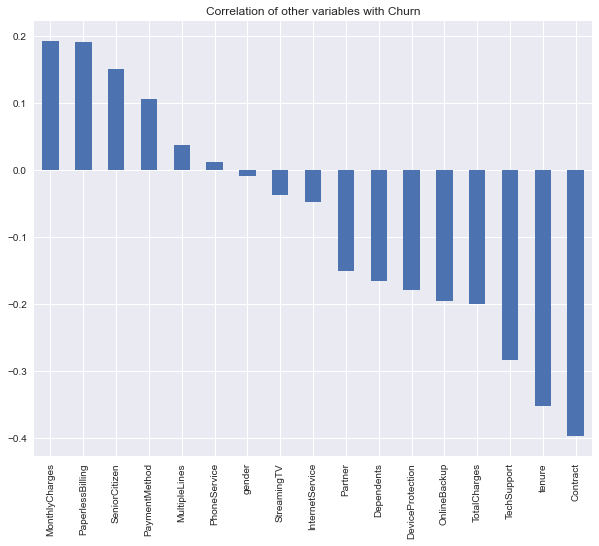

In [652]:
plt.figure(figsize=(10,8))
plt.title('Correlation of other variables with Churn')
tcc.corr()['Churn'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

The above visualization is the graphical representation of the Correlation of Churn column with other columns

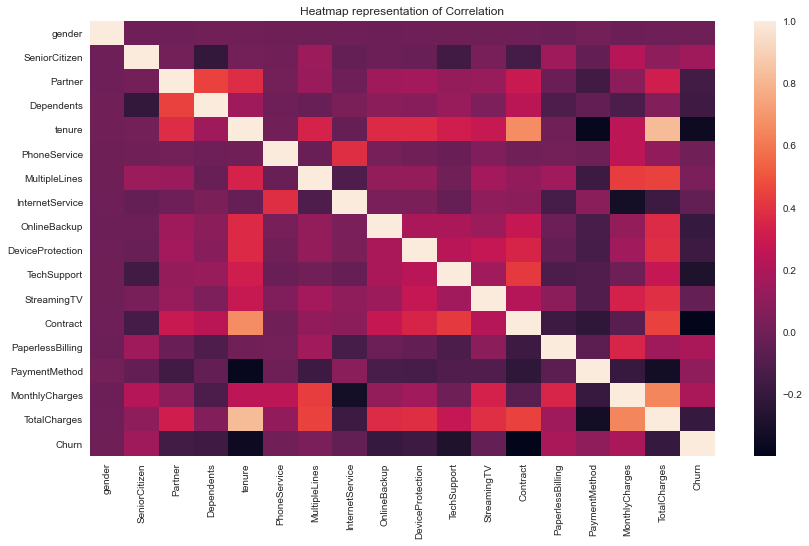

In [653]:
plt.figure(figsize=(14,8))
plt.title('Heatmap representation of Correlation')
sns.heatmap(tcc.corr())
plt.show()

The abpve visualiazation shows the Correlation of different columns in heat map form

In [654]:
tcc=tcc.drop(['gender','DeviceProtection','OnlineBackup','Partner'],axis=1)
tcc.corr()['Churn']

SeniorCitizen       0.150889
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
TechSupport        -0.282492
StreamingTV        -0.036581
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199428
Churn               1.000000
Name: Churn, dtype: float64

dropping 'gender','DeviceProtection','OnlineBackup','Partner' as it wont be usefull further

In [655]:
tcc.columns

Index(['customerID', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [656]:
x=tcc.drop(['Churn','customerID'],axis=1)
y=tcc['Churn']
from sklearn.preprocessing import StandardScaler 
x_features = x
x = StandardScaler().fit_transform(x)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((4930, 13), (4930,), (2113, 13), (2113,))

Scaling and splitting data for performing ML

In [657]:
models = []
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('Random forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression(max_iter=100000)))



# evaluate each model in turn

for name, model in models:
 
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)
   
        




    msg = "%s:\n Training Score: %f \n Testing Score: %f " % (name,a,b)
    print(msg)
    print('\n')
    print(classification_report(y_test, y_pred))

    sc = cross_val_score(model, x_test, y_test, cv=35)
   
    

 
   
    print('Cross val score is :',sc.mean())
    print('\n ')
    print(confusion_matrix(y_test,y_pred))
 
    print('\n ')
    acc=accuracy_score(y_test, y_pred)
    print('Difference between accuracy score and cross validation score is :',acc-sc.mean())
   
    print('\n --------------------------------------------------------\n')
    
    
    
    
    
   


AdaBoost:
 Training Score: 0.804057 
 Testing Score: 0.795078 


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.51      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113

Cross val score is : 0.7941530054644809

 
[[1390  149]
 [ 284  290]]

 
Difference between accuracy score and cross validation score is : 0.0009250825620217284

 --------------------------------------------------------

GradientBoosting:
 Training Score: 0.824949 
 Testing Score: 0.807856 


              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1539
           1       0.70      0.52      0.59       574

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.73      2113
weighted avg       0.80      0.81      0.8

Using for loop for testing multiple alorithms

Logistic regression performs better compared to other algorithms with Cross val score is : 0.8087509758001561



# Hyperparameter Tuning

In [658]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold

x,y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Best: 0.798918 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


The Score has been slightly decreased after performing tuning, so we will without tuning for making model

0.8575147217637589


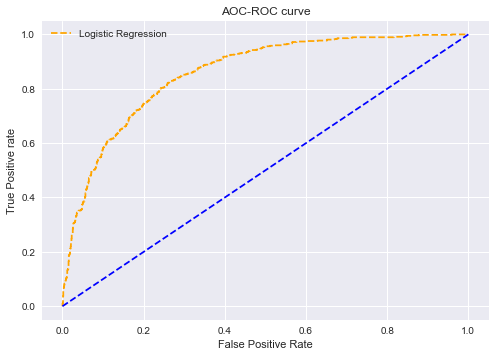

In [659]:
pred_prob1 = grid_search.best_estimator_.predict_proba(x_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('AOC-ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The above visualization curve shows aoc-roc curve

In [660]:
models=LogisticRegression(max_iter=100000)
models.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

# Saving Model

In [661]:
import joblib
joblib.dump(models,"census_ml.obj")

['census_ml.obj']